# *Projet analyse données*

# sujet : Analyse l'imapct des indicateurs éducatifs de API word bank sur croissance économique

In [15]:
import requests
import pandas as pd
from functools import reduce

# Liste des indicateurs avec leurs codes dans l'API de la Banque mondiale
indicators = {
    'Primary Enrollment Rate': 'SE.PRM.ENRR', # Taux d'inscription à l'école primaire
    'Secondary Enrollment Rate': 'SE.SEC.ENRR', # Taux d'inscription à l'école secondaire
    'Tertiary Enrollment Rate': 'SE.TER.ENRR', # Taux d'inscription à l'enseignement supérieur
    'Completion Rate (Primary)': 'SE.PRM.CMPT.ZS', # Taux d'achèvement du cycle primaire
    'Completion Rate (Secondary)': 'SE.SEC.CMPT.LO.ZS', # Taux d'achèvement du cycle secondaire
    'Completion Rate (Tertiary)': 'SE.TER.CMPT.ZS', # Taux d'achèvement de l'enseignement supérieur
    'Public Education Expenditure (% of GDP)': 'SE.XPD.TOTL.GD.ZS',
    'Private Education Expenditure': 'SE.XPD.PRIM.PC.ZS',  # Dépenses privées en éducation
    'Expenditure per Student (Primary)': 'SE.XPD.PRIM.PC.ZS',
    'Expenditure per Student (Secondary)': 'SE.XPD.SECO.PC.ZS',
    'Expenditure per Student (Tertiary)': 'SE.XPD.TERT.PC.ZS',
    'GDP per Capita': 'NY.GDP.PCAP.CD',
    'Economic Growth Rate': 'NY.GDP.MKTP.KD.ZG',
    'Unemployment Rate': 'SL.UEM.TOTL.ZS',
    'Literacy Rate': 'SE.ADT.LITR.ZS',
    'Life Expectancy': 'SP.DYN.LE00.IN',
    'Poverty Rate': 'SI.POV.DDAY'
}

# Fonction pour récupérer les données d'un indicateur
def get_indicator_data(indicator_code):
    url = f"https://api.worldbank.org/v2/country/all/indicator/{indicator_code}?format=json&per_page=10000&date={2017}"
    response = requests.get(url)
    data = response.json()

    # Vérification de la réponse et extraction des données
    if len(data) > 1 and isinstance(data[1], list):
        df = pd.DataFrame(data[1])
        if {'country', 'countryiso3code', 'date', 'value'}.issubset(df.columns):
            df = df[['country', 'countryiso3code', 'date', 'value']].rename(
                columns={'country': 'Country', 'countryiso3code': 'Country_Code', 'date': 'Year', 'value': indicator_code}
            )
            
            # Simplification de la colonne "Country" et suppression de la colonne "Year"
            df['Country'] = df['Country'].apply(lambda x: x if isinstance(x, str) else str(x))
            df['Country_Code'] = df['Country_Code'].apply(lambda x: x if isinstance(x, str) else str(x))
            df = df.drop(columns=['Year'])  # Retirer la colonne Year, puisque vous avez fixé l'année à 2017
            return df
    print(f"No data found for {indicator_code}")
    return pd.DataFrame()

# Récupération des données pour chaque indicateur
data_frames = []
for indicator_name, indicator_code in indicators.items():
    print(f"Fetching data for {indicator_name} ({indicator_code})...")
    df = get_indicator_data(indicator_code)
    if not df.empty:
        data_frames.append(df)

# Fusion des DataFrames
def fusionner_dfs(left, right):
    return pd.merge(left, right, on=['Country', 'Country_Code'], how='outer')

if data_frames:
    # Réduire les DataFrames pour effectuer la fusion
    final_data = reduce(fusionner_dfs, data_frames)
    print("Fusion réussie.")

    # Afficher les 10 premières lignes des données
    print("Aperçu des données :")
    print(final_data.head(10))

    # Exporter les données fusionnées dans un fichier CSV
    final_data.to_csv("education_economics_indicators.csv", index=False)
    print("Les données ont été enregistrées dans 'education_economics_indicators.csv'")
else:
    print("Aucune donnée n'a été récupérée.")


Fetching data for Primary Enrollment Rate (SE.PRM.ENRR)...
Fetching data for Secondary Enrollment Rate (SE.SEC.ENRR)...
Fetching data for Tertiary Enrollment Rate (SE.TER.ENRR)...
Fetching data for Completion Rate (Primary) (SE.PRM.CMPT.ZS)...
Fetching data for Completion Rate (Secondary) (SE.SEC.CMPT.LO.ZS)...
Fetching data for Completion Rate (Tertiary) (SE.TER.CMPT.ZS)...
No data found for SE.TER.CMPT.ZS
Fetching data for Public Education Expenditure (% of GDP) (SE.XPD.TOTL.GD.ZS)...
Fetching data for Private Education Expenditure (SE.XPD.PRIM.PC.ZS)...
Fetching data for Expenditure per Student (Primary) (SE.XPD.PRIM.PC.ZS)...
Fetching data for Expenditure per Student (Secondary) (SE.XPD.SECO.PC.ZS)...
Fetching data for Expenditure per Student (Tertiary) (SE.XPD.TERT.PC.ZS)...
Fetching data for GDP per Capita (NY.GDP.PCAP.CD)...
Fetching data for Economic Growth Rate (NY.GDP.MKTP.KD.ZG)...
Fetching data for Unemployment Rate (SL.UEM.TOTL.ZS)...
Fetching data for Literacy Rate (SE.AD

In [16]:
final_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 266 entries, 0 to 265
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Country              266 non-null    object 
 1   Country_Code         266 non-null    object 
 2   SE.PRM.ENRR          217 non-null    float64
 3   SE.SEC.ENRR          187 non-null    float64
 4   SE.TER.ENRR          188 non-null    float64
 5   SE.PRM.CMPT.ZS       180 non-null    float64
 6   SE.SEC.CMPT.LO.ZS    181 non-null    float64
 7   SE.XPD.TOTL.GD.ZS    216 non-null    float64
 8   SE.XPD.PRIM.PC.ZS_x  39 non-null     float64
 9   SE.XPD.PRIM.PC.ZS_y  39 non-null     float64
 10  SE.XPD.SECO.PC.ZS    36 non-null     float64
 11  SE.XPD.TERT.PC.ZS    38 non-null     float64
 12  NY.GDP.PCAP.CD       258 non-null    float64
 13  NY.GDP.MKTP.KD.ZG    257 non-null    float64
 14  SL.UEM.TOTL.ZS       235 non-null    float64
 15  SE.ADT.LITR.ZS       79 non-null     flo

# Nettoyage de Données 

Ce code nettoie et prépare un jeu de données contenant des indicateurs socio-économiques et éducatifs. Il élimine les colonnes redondantes, gère les valeurs manquantes en supprimant celles dépassant un seuil ou en les remplaçant par des moyennes, et extrait les noms de pays d'une colonne encodée. Enfin, il supprime les doubles pour garantir des données fiables et prêtes à l'analyse.

In [17]:
import pandas as pd
import ast

# Fonction pour nettoyer la colonne "Country"
def extract_country_name(value):
    try:
        # Convertir la chaîne en dictionnaire et extraire le nom du pays
        parsed = ast.literal_eval(value)
        return parsed.get('value') if isinstance(parsed, dict) else value
    except (ValueError, SyntaxError):
        return value

# Charger le dataset
data = pd.read_csv("education_economics_indicators.csv")

# Étape 1: Supprimer les colonnes en double
data_cleaned = data.drop(columns=['SE.XPD.PRIM.PC.ZS_y'], errors='ignore')

# Étape 2: Nettoyer la colonne "Country"
data_cleaned['Country'] = data_cleaned['Country'].apply(extract_country_name)

# Étape 3: Gérer les valeurs manquantes
# Supprimer les colonnes avec plus de 85% de valeurs manquantes
threshold = 0.85 * len(data_cleaned)
data_cleaned = data_cleaned.loc[:, data_cleaned.isnull().sum() < threshold]

# Supprimer les lignes où "Country_Code" est manquant (optionnel : ou remplacer par 'Unknown')
data_cleaned = data_cleaned.dropna(subset=['Country_Code'])

# Remplir les valeurs manquantes dans les autres colonnes avec la moyenne
for column in data_cleaned.select_dtypes(include=['float64']).columns:
    data_cleaned[column] = data_cleaned[column].fillna(data_cleaned[column].mean())

# Étape 4: Vérifier et supprimer les doublons
data_cleaned = data_cleaned.drop_duplicates()

# Sauvegarder le fichier nettoyé (optionnel)
data_cleaned.to_csv("cleaned_data.csv", index=False)


#  Transformation de donées 

Ce code applique une normalisation standardisée sur des indicateurs socio-économiques et éducatifs pour uniformiser les échelles des variables. Il renomme ensuite les colonnes avec des noms descriptifs pour améliorer la lisibilité et faciliter l'analyse ultérieure. Enfin, les données transformées et renommées sont exportées dans un nouveau fichier CSV prêt pour une exp.

In [18]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler, StandardScaler

# Charger les données nettoyées
df = pd.read_csv("cleaned_data.csv")

def transform_data(df):
    
    # 3. Normalisation des variables numériques
    # Liste des colonnes à normaliser
    columns_to_normalize = [
        'SE.PRM.ENRR', 'SE.SEC.ENRR', 'SE.TER.ENRR',
        'SE.PRM.CMPT.ZS', 'SE.SEC.CMPT.LO.ZS', 
        'SE.XPD.TOTL.GD.ZS', 
        'NY.GDP.PCAP.CD', 'NY.GDP.MKTP.KD.ZG',
        'SL.UEM.TOTL.ZS', 'SE.ADT.LITR.ZS', 'SP.DYN.LE00.IN', 'SI.POV.DDAY'
    ]
    
    # Normalisation Min-Max
    scaler = StandardScaler()
    df[columns_to_normalize] = scaler.fit_transform(df[columns_to_normalize])
    
    return df

# Appliquer la transformation des données
df_transformed = transform_data(df)


# Renommage des colonnes pour qu'elles soient plus compréhensibles
df_transformed.rename(columns={
    'Country': 'Country Name',    
    'Country_Code': 'Country ISO Code',    
    'SE.PRM.ENRR': 'Primary Enrollment Rate (%)',     
    'SE.SEC.ENRR': 'Secondary Enrollment Rate (%)',   
    'SE.TER.ENRR': 'Tertiary Enrollment Rate (%)',    
    'SE.PRM.CMPT.ZS': 'Primary Completion Rate (%)', 
    'SE.SEC.CMPT.LO.ZS': 'Secondary Completion Rate (%)',
    'SE.XPD.TOTL.GD.ZS': 'Public Education Expenditure (% of GDP)', 
    'NY.GDP.PCAP.CD': 'GDP per Capita (USD)', 
    'NY.GDP.MKTP.KD.ZG': 'Economic Growth Rate (%)', 
    'SL.UEM.TOTL.ZS': 'Unemployment Rate (%)', 
    'SE.ADT.LITR.ZS': 'Literacy Rate (%)', 
    'SP.DYN.LE00.IN': 'Life Expectancy (Years)', 
    'SI.POV.DDAY': 'Poverty Rate (%)' 
}, inplace=True)

# Vérification du résultat
print("Aperçu des données après transformation, normalisation et renommage :")
print(df_transformed.head())

# Exporter les données transformées et renommées dans un nouveau fichier CSV
df_transformed.to_csv("education_economics_indicators_transformed.csv", index=False)
print("Les données transformées, normalisées et renommées ont été enregistrées dans 'education_economics_indicators_transformed.csv'")


Aperçu des données après transformation, normalisation et renommage :
                     Country Name Country ISO Code  \
0     Africa Eastern and Southern              AFE   
1      Africa Western and Central              AFW   
2                      Arab World              ARB   
3          Caribbean small states              CSS   
4  Central Europe and the Baltics              CEB   

   Primary Enrollment Rate (%)  Secondary Enrollment Rate (%)  \
0                     0.065129                      -1.836881   
1                    -1.301291                      -1.832654   
2                    -1.114646                      -0.727716   
3                    -0.398280                       0.084293   
4                    -0.600068                       0.682662   

   Tertiary Enrollment Rate (%)  Primary Completion Rate (%)  \
0                     -1.488302                    -1.744407   
1                     -1.457696                    -1.804058   
2                     

# Regression  linéaire : 

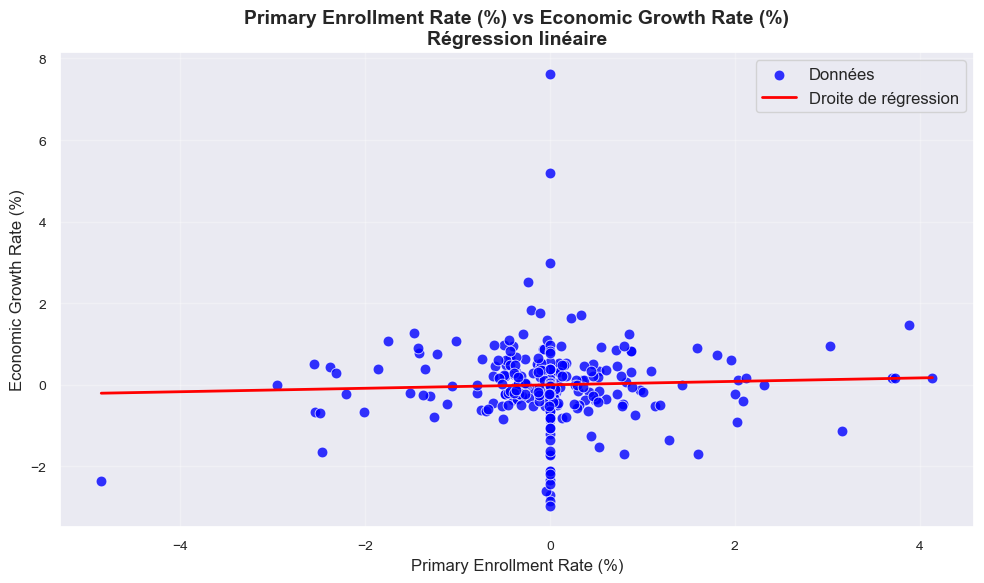

Analyse pour Primary Enrollment Rate (%) :
 - Coefficient (pente) : 0.0423
 - Interception : -0.0000
 - Erreur quadratique moyenne (MSE) : 0.9982
 - Coefficient de détermination (R²) : 0.0018



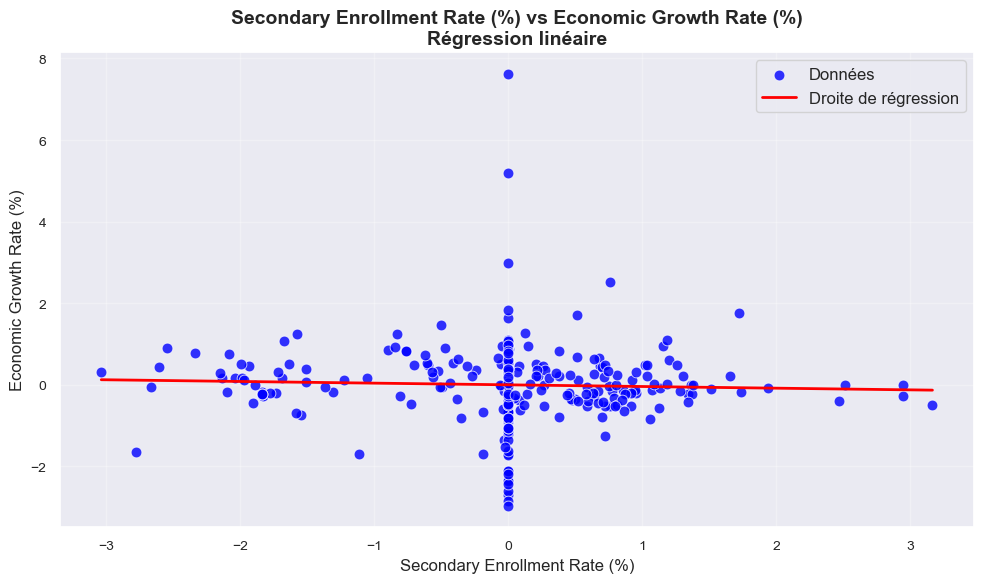

Analyse pour Secondary Enrollment Rate (%) :
 - Coefficient (pente) : -0.0412
 - Interception : -0.0000
 - Erreur quadratique moyenne (MSE) : 0.9983
 - Coefficient de détermination (R²) : 0.0017



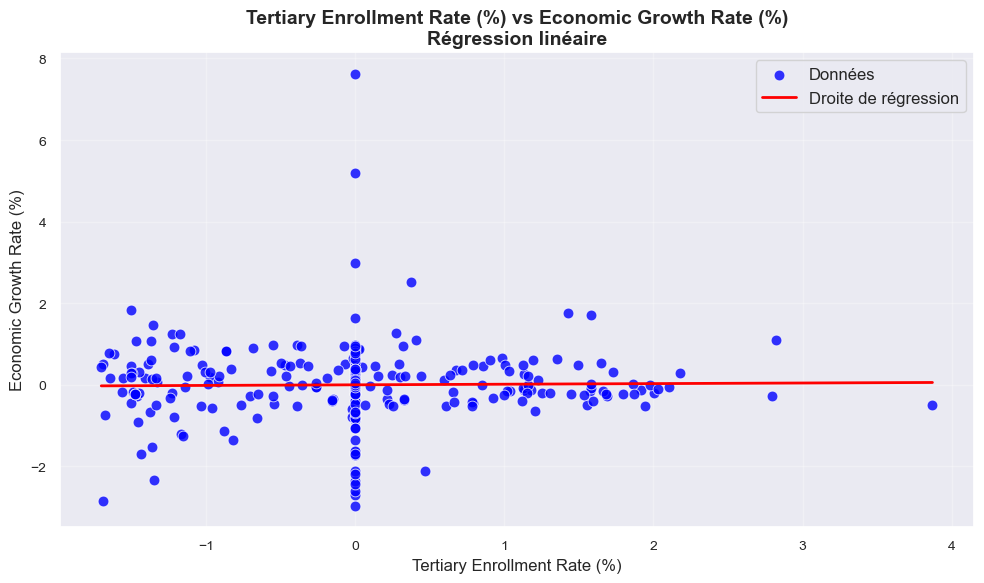

Analyse pour Tertiary Enrollment Rate (%) :
 - Coefficient (pente) : 0.0149
 - Interception : -0.0000
 - Erreur quadratique moyenne (MSE) : 0.9998
 - Coefficient de détermination (R²) : 0.0002



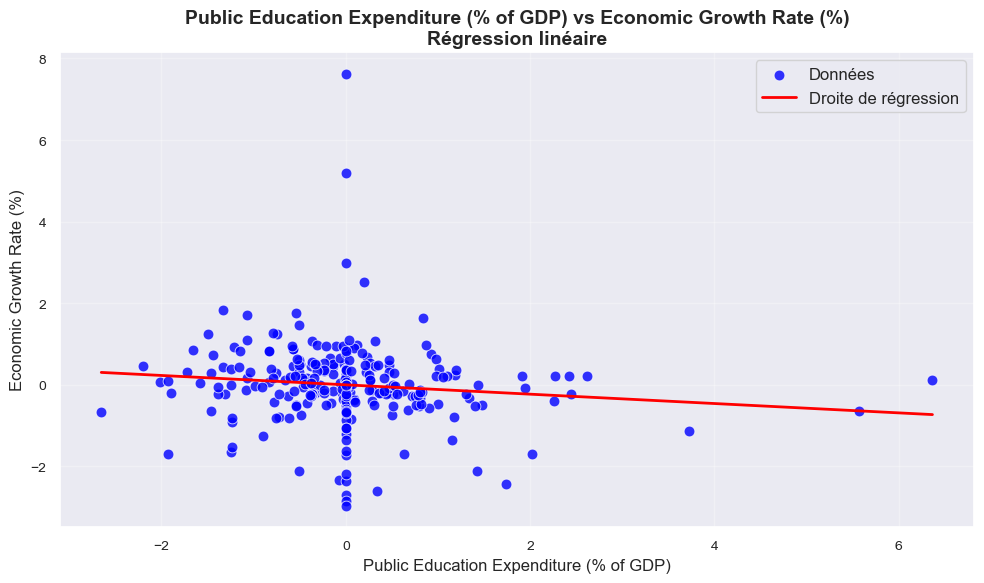

Analyse pour Public Education Expenditure (% of GDP) :
 - Coefficient (pente) : -0.1146
 - Interception : -0.0000
 - Erreur quadratique moyenne (MSE) : 0.9869
 - Coefficient de détermination (R²) : 0.0131



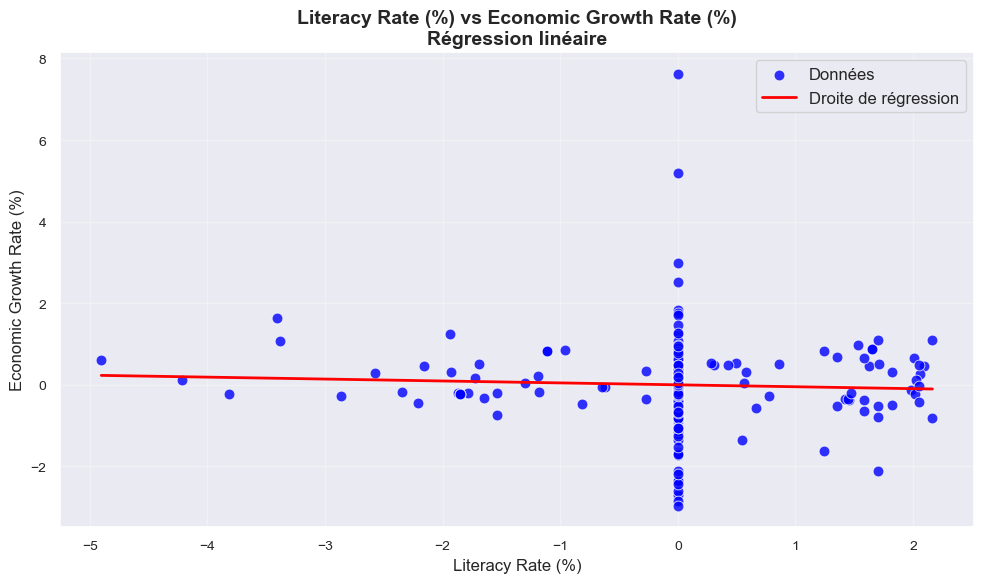

Analyse pour Literacy Rate (%) :
 - Coefficient (pente) : -0.0471
 - Interception : -0.0000
 - Erreur quadratique moyenne (MSE) : 0.9978
 - Coefficient de détermination (R²) : 0.0022



In [22]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
import numpy as np
from sklearn.metrics import mean_squared_error, r2_score

# Charger les données transformées
data = pd.read_csv("education_economics_indicators_transformed.csv")

# Étape 1 : Sélection des variables
variables_explicatives = [
    'Primary Enrollment Rate (%)', 
    'Secondary Enrollment Rate (%)', 
    'Tertiary Enrollment Rate (%)', 
    'Public Education Expenditure (% of GDP)', 
    'Literacy Rate (%)'
]
variable_cible = 'Economic Growth Rate (%)'

# Supprimer les lignes avec des valeurs manquantes pour les variables sélectionnées
data = data.dropna(subset=variables_explicatives + [variable_cible])

# Étape 2 : Ajustement et visualisation pour chaque variable explicative
for var in variables_explicatives:
    X = data[[var]].values  # Variable explicative sous forme de matrice 2D
    y = data[variable_cible].values  # Variable cible

    # Ajustement du modèle de régression linéaire
    model = LinearRegression()
    model.fit(X, y)
    
    # Générer les prédictions pour tracer la droite de régression
    x_range = np.linspace(X.min(), X.max(), 100).reshape(-1, 1)  # Intervalle de valeurs pour la droite
    y_pred = model.predict(x_range)

    # Affichage du nuage de points et de la droite de régression
    plt.figure(figsize=(10, 6))  # Augmenter la taille de la figure pour plus de lisibilité
    sns.scatterplot(
        x=data[var], y=data[variable_cible], alpha=0.8, color='blue', 
        label='Données', s=60  # Augmenter la taille des points
    )
    plt.plot(x_range, y_pred, color='red', linewidth=2, label='Droite de régression')
    plt.title(f'{var} vs {variable_cible}\nRégression linéaire', fontsize=14, fontweight='bold')
    plt.xlabel(var, fontsize=12)
    plt.ylabel(variable_cible, fontsize=12)
    plt.legend(fontsize=12)
    plt.xticks(fontsize=10)
    plt.yticks(fontsize=10)
    plt.grid(alpha=0.3)  # Rendre la grille plus discrète
    plt.tight_layout()  # Ajuster les marges pour éviter les chevauchements
    plt.show()
    
    # Calcul de l'erreur quadratique moyenne (MSE) et du coefficient de détermination (R²)
    mse = mean_squared_error(y, model.predict(X))
    r2 = r2_score(y, model.predict(X))

    # Affichage des résultats de la régression
    print(f"Analyse pour {var} :")
    print(f" - Coefficient (pente) : {model.coef_[0]:.4f}")
    print(f" - Interception : {model.intercept_:.4f}")
    print(f" - Erreur quadratique moyenne (MSE) : {mse:.4f}")
    print(f" - Coefficient de détermination (R²) : {r2:.4f}")
    print()


Les coefficients de détermination (R²) sont extrêmement faibles pour toutes les variables éducatives analysées, ce qui indique que ces variables expliquent très peu  les variations du taux de croissance économique
le MSE proche de 1 reflète une mauvaise performance des modèles. Cela est cohérent avec les faibles valeurs du coefficient de détermination
𝑅
2
R 
2
 , qui montre que ces variables explicatives ne sont pas de bons prédicteurs pour le taux de croissance économique

# Etude de corrélation : 

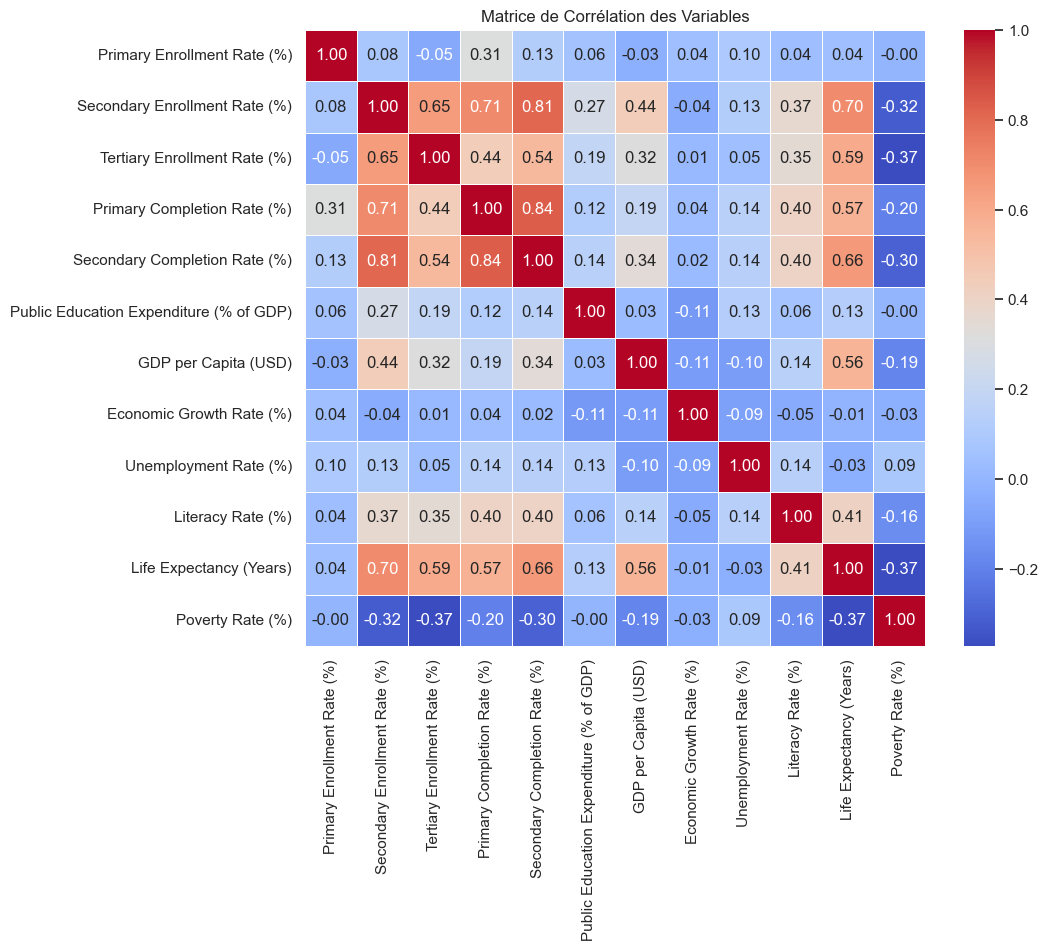

In [26]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Charger les données transformées
df = pd.read_csv("education_economics_indicators_transformed.csv")

# Filtrer uniquement les colonnes numériques
df_numeric = df.select_dtypes(include=['number'])

# Calcul de la matrice de corrélation
correlation_matrix = df_numeric.corr()

# Affichage de la matrice de corrélation sous forme de carte thermique
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Matrice de Corrélation des Variables')
plt.show()


Les taux d'inscription (Primary, Secondary, Tertiary) et de complétion scolaire sont fortement corrélés entre eux (corrélations > 0.7), indiquant une cohérence dans l'accès à l'éducation.
La dépense publique en éducation (% du PIB) est faiblement corrélée à la majorité des variables, suggérant une relation limitée avec les indicateurs éducatifs ou économiques.
Le taux d'alphabétisation et l'espérance de vie sont modérément liés au taux d'inscription tertiaire (corrélations ~0.6), soulignant leur rôle dans le développement humain.
Le taux de pauvreté a une corrélation négative avec plusieurs indicateurs éducatifs et économiques, indiquant un lien entre pauvreté et faible développement éducatif.

# ACP

Valeurs propres : [4.35 1.4  1.19 0.95 0.92 0.81 0.73 0.64 0.47 0.27 0.19 0.12]
Vecteurs propres :
 [[-0.07 -0.43 -0.36 -0.39 -0.42 -0.11 -0.25  0.01 -0.06 -0.26 -0.41  0.21]
 [ 0.45  0.03 -0.14  0.26  0.11  0.28 -0.37 -0.08  0.57  0.12 -0.19  0.32]
 [ 0.39 -0.06 -0.09  0.24  0.11 -0.44 -0.2   0.69 -0.21 -0.03 -0.02 -0.12]
 [-0.62 -0.02  0.22 -0.06  0.02 -0.11 -0.4   0.32  0.37  0.37 -0.08 -0.1 ]
 [-0.01  0.08  0.18 -0.08 -0.04  0.75 -0.19  0.39 -0.17 -0.36 -0.05 -0.19]
 [-0.26  0.11 -0.05  0.06  0.1   0.04  0.33  0.38 -0.01 -0.11  0.1   0.79]
 [-0.03  0.09  0.03 -0.08  0.05 -0.24  0.26  0.1   0.62 -0.63 -0.   -0.25]
 [ 0.3  -0.18  0.01 -0.36 -0.34  0.17  0.45  0.32  0.26  0.45  0.14 -0.1 ]
 [ 0.26  0.01  0.83 -0.16 -0.23 -0.21 -0.15 -0.09 -0.04 -0.11 -0.02  0.28]
 [ 0.01  0.19  0.14  0.03  0.17  0.    0.35  0.04 -0.08  0.15 -0.87 -0.08]
 [ 0.1   0.8  -0.23 -0.48 -0.1  -0.12 -0.2   0.02 -0.04  0.06  0.03  0.04]
 [ 0.12 -0.27  0.04 -0.57  0.76  0.01 -0.07 -0.02 -0.02  0.01  0.05  0.05]]

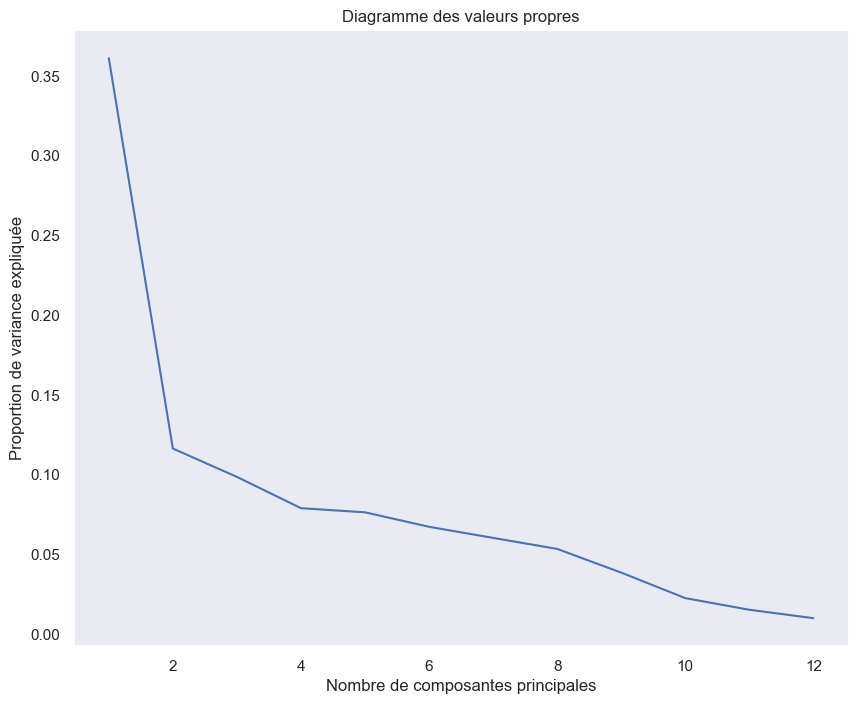

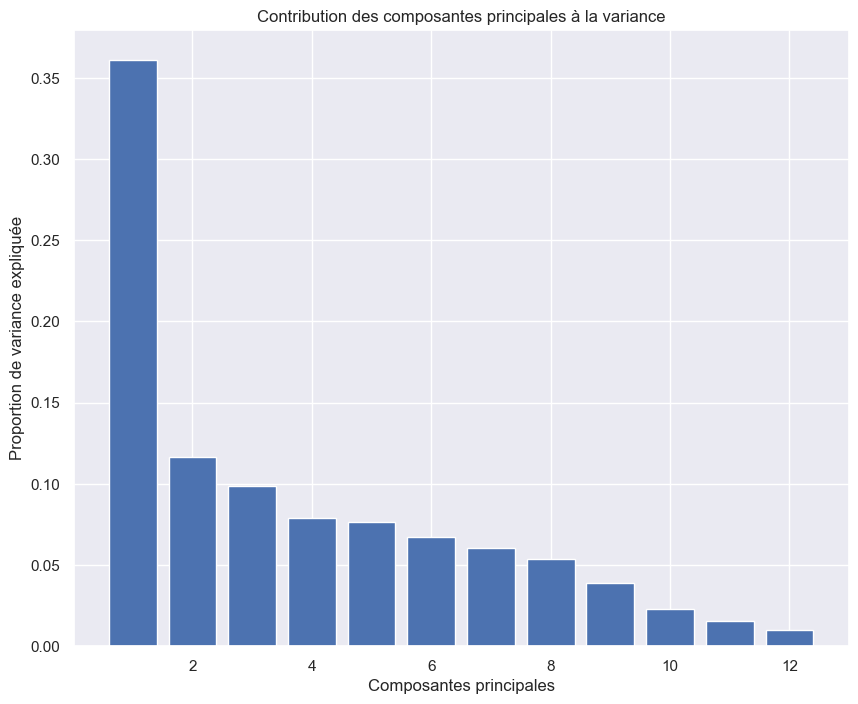

In [24]:
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf
import statsmodels.api as sm

# Charger les données transformées
df_transformed = pd.read_csv("education_economics_indicators_transformed.csv")

# Filtrer uniquement les colonnes numériques
df_numeric = df_transformed.select_dtypes(include=['float64', 'int64'])

# Appliquer l'ACP
pca = PCA(n_components=len(df_numeric.columns))
pca.fit(df_numeric)

# Extraire les valeurs propres (explained_variance_) et les vecteurs propres (components_)
eigenvalues = pca.explained_variance_
eigenvectors = pca.components_

# Arrondir les valeurs propres et les vecteurs propres
eigenvalues_rounded = np.round(eigenvalues, 2)
eigenvectors_rounded = np.round(eigenvectors, 2)

# Afficher les résultats
print("Valeurs propres :", eigenvalues_rounded)
print("Vecteurs propres :\n", eigenvectors_rounded)

# Tracer le diagramme des valeurs propres (proportion de variance expliquée)
plt.figure(figsize=(10, 8))
plt.plot(range(1, len(pca.explained_variance_ratio_) + 1), pca.explained_variance_ratio_)
plt.xlabel('Nombre de composantes principales')
plt.ylabel('Proportion de variance expliquée')
plt.title('Diagramme des valeurs propres')
plt.grid()
plt.show()

# Tracer la contribution de chaque composante principale aux variances
plt.figure(figsize=(10, 8))
plt.bar(range(1, len(pca.explained_variance_ratio_) + 1), pca.explained_variance_ratio_)
plt.xlabel('Composantes principales')
plt.ylabel('Proportion de variance expliquée')
plt.title('Contribution des composantes principales à la variance')
plt.grid(True)
plt.show()


Ce diagramme des valeurs propres, également appelé scree plot, illustre la proportion de variance expliquée par chaque composante principale dans le cadre d’une analyse en composantes principales (ACP). La première composante principale capture une proportion significative de la variance (~35 %), ce qui montre qu’elle contient l’essentiel de l’information des données. Une diminution rapide des valeurs propres est visible après les premières composantes (effet "coude"), indiquant que les 2 ou 3 premières composantes suffisent à représenter efficacement les données. Au-delà de la quatrième composante, la variance expliquée devient négligeable, ce qui suggère que ces composantes contiennent peu d’informations pertinentes. Ainsi, cette analyse permet de réduire la dimensionnalité tout en conservant une bonne partie de la structure des données

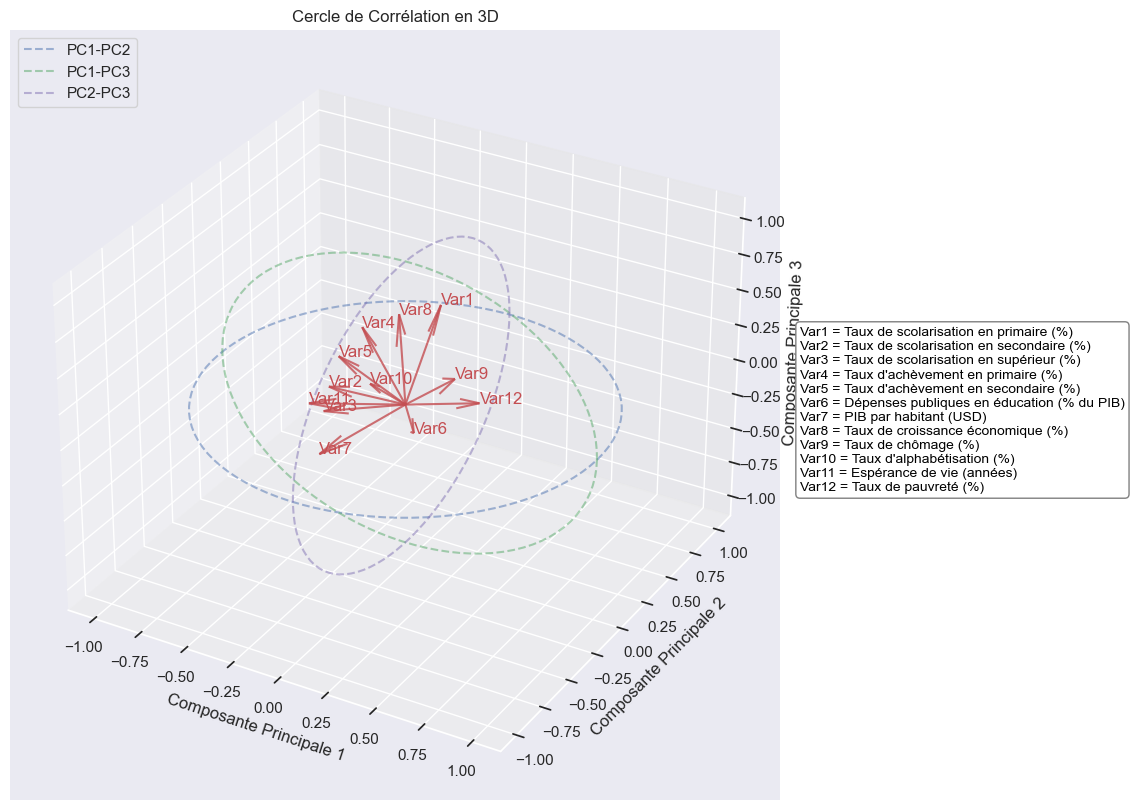

In [25]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.decomposition import PCA

# Charger les données transformées
df_transformed = pd.read_csv("education_economics_indicators_transformed.csv")

# Sélectionner les colonnes numériques pour l'ACP
df_numeric = df_transformed.select_dtypes(include=['float64', 'int64'])

# Appliquer l'ACP
pca = PCA(n_components=3)  # Limité à 3 composantes principales pour la visualisation 3D
pca.fit(df_numeric)

# Extraire les composantes principales
components = pca.components_

# Noms des variables
variable_names = [
    'Taux de scolarisation en primaire (%)', 
    'Taux de scolarisation en secondaire (%)',
    'Taux de scolarisation en supérieur (%)', 
    'Taux d\'achèvement en primaire (%)',
    'Taux d\'achèvement en secondaire (%)', 
    'Dépenses publiques en éducation (% du PIB)',
    'PIB par habitant (USD)', 
    'Taux de croissance économique (%)', 
    'Taux de chômage (%)',
    'Taux d\'alphabétisation (%)', 
    'Espérance de vie (années)', 
    'Taux de pauvreté (%)'
]

# Création de la figure 3D
fig = plt.figure(figsize=(12, 10))
ax = fig.add_subplot(111, projection='3d')

# Tracer les flèches pour les variables
for i, (x, y, z) in enumerate(components.T):
    ax.quiver(0, 0, 0, x, y, z, color='r', alpha=0.8)
    ax.text(x, y, z, f"Var{i+1}", color='r')

# Tracer les cercles projetés sur les plans PC1-PC2, PC1-PC3, et PC2-PC3
theta = np.linspace(0, 2 * np.pi, 100)
circle_xy = np.array([np.cos(theta), np.sin(theta), np.zeros_like(theta)])  # Plan PC1-PC2
circle_xz = np.array([np.cos(theta), np.zeros_like(theta), np.sin(theta)])  # Plan PC1-PC3
circle_yz = np.array([np.zeros_like(theta), np.cos(theta), np.sin(theta)])  # Plan PC2-PC3

# Ajouter les cercles au graphique
ax.plot(circle_xy[0], circle_xy[1], circle_xy[2], 'b--', alpha=0.5, label='PC1-PC2')
ax.plot(circle_xz[0], circle_xz[1], circle_xz[2], 'g--', alpha=0.5, label='PC1-PC3')
ax.plot(circle_yz[0], circle_yz[1], circle_yz[2], 'm--', alpha=0.5, label='PC2-PC3')

# Ajuster les limites
ax.set_xlim([-1.1, 1.1])
ax.set_ylim([-1.1, 1.1])
ax.set_zlim([-1.1, 1.1])

# Ajouter des labels et un titre
ax.set_xlabel('Composante Principale 1')
ax.set_ylabel('Composante Principale 2')
ax.set_zlabel('Composante Principale 3')
ax.set_title('Cercle de Corrélation en 3D')

# Créer une légende descriptive à droite
legend_labels = [f"Var{i+1} = {name}" for i, name in enumerate(variable_names)]
legend_text = "\n".join(legend_labels)

# Ajouter un texte hors du graphique pour la légende descriptive
plt.figtext(0.85, 0.5, legend_text, fontsize=10, color='black', ha='left', va='center', bbox=dict(boxstyle="round", facecolor="white", edgecolor="gray"))

# Afficher la légende des cercles
ax.legend(loc='upper left')

plt.show()


# Analyse Anova 

In [10]:

data = pd.read_csv('education_economics_indicators_transformed_with_categories.csv')
data.head()

FileNotFoundError: [Errno 2] No such file or directory: 'education_economics_indicators_transformed_with_categories.csv'

In [11]:
sns.set()
ax = sns.boxplot(x="Expenditure_Category", y="GDP per Capita (USD)", data=data, color='white')

plt.xlabel('Expenditure_Category')
plt.ylabel('GDP per Capita (USD)')
plt.title('Boîtes à moustaches')
plt.show()

ValueError: Could not interpret input 'Expenditure_Category'

Cette boîte à moustaches montre la répartition du PIB par habitant (en USD) en fonction de trois catégories de dépenses : Medium, Low, et High.

1-Central Tendency (Médianes) :

Les médianes diffèrent selon les catégories de dépenses. Le PIB par habitant semble plus élevé pour la catégorie High que pour les catégories Medium et Low, suggérant une association entre des niveaux de dépenses élevés et des PIB par habitant plus élevés.

2-Dispersion :

La catégorie High présente une plus grande dispersion (écart entre les quartiles et longueurs des moustaches) par rapport aux autres catégories, indiquant une variabilité plus élevée du PIB par habitant dans ce groupe. Les catégories Medium et Low ont des intervalles interquartiles plus serrés, ce qui montre une répartition plus concentrée autour de la médiane. 3-Présence d'outliers :

Des points au-dessus des moustaches sont visibles dans toutes les catégories, particulièrement dans les catégories Medium et High, indiquant des valeurs extrêmes dans ces groupes. 4-Tendance globale :

La catégorie High montre globalement des valeurs de PIB par habitant plus élevées, ce qui pourrait indiquer une corrélation positive entre une forte catégorie de dépenses et le niveau de PIB par habitant.

Hypothèses de l'ANOVA :

Hypothèse nulle (H₀) : Les moyennes des PIB par habitant sont égales pour toutes les catégories de dépenses (High, Medium, Low), c'est-à-dire qu'il n'y a pas de différence significative entre elles.

Hypothèse alternative (H₁) : Les moyennes du PIB par habitant diffèrent significativement entre au moins deux des catégories de dépenses (High, Medium, Low).

In [13]:
anova_expenditure = smf.ols('Q("GDP per Capita (USD)") ~ Q("Expenditure_Category")', data=data).fit()
print(anova_expenditure.summary())


                                OLS Regression Results                               
Dep. Variable:     Q("GDP per Capita (USD)")   R-squared:                       0.008
Model:                                   OLS   Adj. R-squared:                  0.000
Method:                        Least Squares   F-statistic:                     1.028
Date:                       Sat, 21 Dec 2024   Prob (F-statistic):              0.359
Time:                               22:48:55   Log-Likelihood:                -369.31
No. Observations:                        261   AIC:                             744.6
Df Residuals:                            258   BIC:                             755.3
Df Model:                                  2                                         
Covariance Type:                   nonrobust                                         
                                          coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------

Statistiques globales du modèle : R-squared : 0.008. Cela indique que seulement 0,8 % de la variance du PIB par habitant est expliquée par les catégories de dépenses. Cela suggère une très faible capacité explicative du modèle. Adj. R-squared : 0.000. Après ajustement, le modèle n'apporte aucune explication significative des variations. Prob (F-statistic) : 0.359. Cette p-valeur est supérieure à 0.05, ce qui indique que le modèle dans son ensemble n'est pas statistiquement significatif.
Conclusion : Aucun des coefficients n'est statistiquement significatif, ce qui signifie qu'il n'y a pas de preuve que les différentes catégories de dépenses affectent significativement le PIB par habitant. Le modèle global n'est pas significatif (p = 0.359), et sa capacité explicative est presque nulle.

In [14]:
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm

# Filtrage des données nécessaires
anova_data = data[['GDP per Capita (USD)', 'Expenditure_Category']].dropna()

# Construction du modèle ANOVA
anova_model = ols('Q("GDP per Capita (USD)") ~ C(Expenditure_Category)', data=anova_data).fit()

# Test d'ANOVA
anova_results = anova_lm(anova_model, typ=2)

# Affichage des résultats
print("Résultats du test ANOVA :")
print(anova_results)


Résultats du test ANOVA :
                             sum_sq     df         F    PR(>F)
C(Expenditure_Category)    2.063216    2.0  1.027876  0.359226
Residual                 258.936784  258.0       NaN       NaN


La p-valeur (0.3592) est supérieure au seuil de 0.05, donc on ne rejette pas l'hypothèse nulle. 
Cela signifie qu'il n'y a pas de différence significative entre les moyennes du PIB par habitant pour les catégories High, Medium, et Low. les catégories de dépenses (High, Medium, Low) n'ont pas d'influence significative sur le PIB par habitant. Puisque la p-valeur est supérieure à 0.05, il n'y a pas de preuve statistique suffisante pour affirmer qu'il existe une relation significative entre ces deux variables.

In [16]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd

# Test de Tukey HSD
tukey = pairwise_tukeyhsd(endog=anova_data['GDP per Capita (USD)'],
                          groups=anova_data['Expenditure_Category'],
                          alpha=0.05)

# Résultats du test de Tukey
print("Résultats du test post hoc Tukey HSD :")
print(tukey)



Résultats du test post hoc Tukey HSD :
Multiple Comparison of Means - Tukey HSD, FWER=0.05
group1 group2 meandiff p-adj   lower  upper  reject
---------------------------------------------------
  High    Low  -0.2184 0.3254 -0.5777 0.1408  False
  High Medium  -0.1068 0.7645  -0.467 0.2535  False
   Low Medium   0.1116 0.7392 -0.2434 0.4667  False
---------------------------------------------------


Dans toutes les comparaisons (High vs Low, High vs Medium, Low vs Medium), les p-valeurs ajustées (p-adj) sont supérieures à 0.05, ce qui signifie qu'aucune des différences observées entre les groupes n'est statistiquement significative.

Conclusion : Le test post hoc Tukey confirme les résultats du test ANOVA. Il n'y a pas de différence significative entre les catégories de dépenses en termes de PIB par habitant.